In [2]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

## **Create Data**

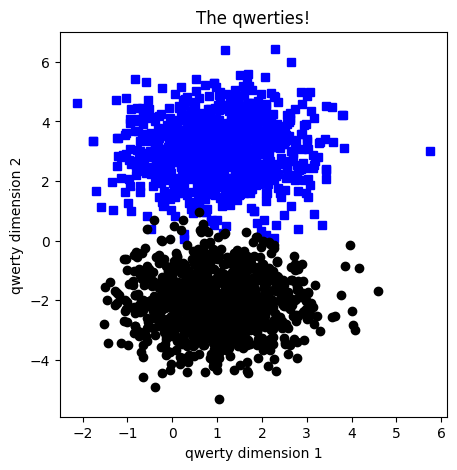

In [3]:
# create data

nPerClust = 1000
blur = 1

A = [  1,  3 ]
B = [  1, -2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

## **Create the model**

In [4]:
class ANNclassifier(nn.Module):
  def __init__(self, uUnits, nLayers):

    super().__init__()

    # create dictionary to store the layers
    self.layers = nn.ModuleDict()
    self.nLayers = nLayers

    ### input layer
    self.layers['input'] = nn.Linear(2,uUnits)

    ### hidden layers
    for i in range(nLayers):
      self.layers[f'hidden{i}'] = nn.Linear(uUnits,uUnits)

    ### output layer
    self.layers['output'] = nn.Linear(uUnits,1)

    # forward pass
  def forward(self,x):

    # input layer
    x = self.layers['input'](x)
    x = F.relu(x)

    # hidden layers
    for i in range(self.nLayers):
      x = self.layers[f'hidden{i}'](x)
      x = F.relu(x)

    # return output layer
    x = self.layers['output'](x)
    x = torch.sigmoid(x)
    return x

In [5]:
## test the model
nUnitsperLayer = 16
nLayers = 1

ANNmodel = ANNclassifier(nUnitsperLayer,nLayers)

sample_data = torch.randn(10,2)

y = ANNmodel(sample_data)

y.shape

y

tensor([[0.4191],
        [0.3474],
        [0.3118],
        [0.4333],
        [0.3727],
        [0.3791],
        [0.3486],
        [0.3357],
        [0.3589],
        [0.3949]], grad_fn=<SigmoidBackward0>)

In [17]:
ANNmodel.layers['input']
for m in ANNmodel.modules():
  print(m)

ANNclassifier(
  (layers): ModuleDict(
    (input): Linear(in_features=2, out_features=16, bias=True)
    (hidden0): Linear(in_features=16, out_features=16, bias=True)
    (output): Linear(in_features=16, out_features=1, bias=True)
  )
)
ModuleDict(
  (input): Linear(in_features=2, out_features=16, bias=True)
  (hidden0): Linear(in_features=16, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=1, bias=True)
)
Linear(in_features=2, out_features=16, bias=True)
Linear(in_features=16, out_features=16, bias=True)
Linear(in_features=16, out_features=1, bias=True)


## **Train the model**

In [ ]:
# a function that trains the model

# a fixed parameter

def trainTheModel(ANNmodel, learning_rate=0.1, numepochs=10000):

  #define the loss function and optimizer
  lossfun = nn.BCELoss()
  optimizer = torch.optim.SGD(ANNmodel.parameters(),lr=learning_rate)

  # initialize losses
  losses = torch.zeros(numepochs)

  # loop over epochs
  for epochi in range(numepochs):

    # forward pass
    yHat = ANNmodel(data)

    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



  # final forward pass
  predictions = ANNmodel(data)

  # compute the predictions and report accuracy

  totalacc = 100*torch.mean(((predictions>0.5) == labels).float())

  return losses,predictions,totalacc

Final accuracy: 99.35%


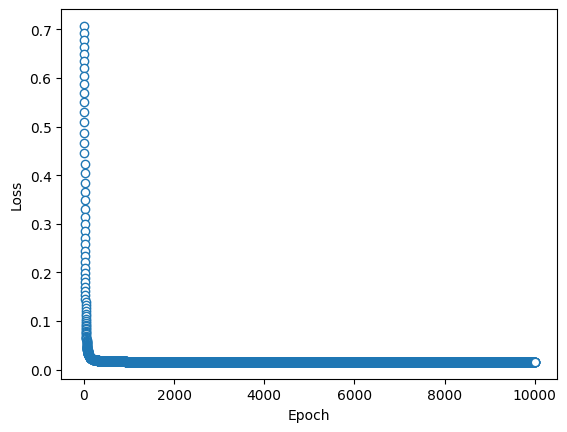

In [ ]:
## Run the model by specifying hyperparameters (layers, node per layer)
nUnitsperLayer = 16
nLayers = 1

ANNmodel = ANNclassifier(nUnitsperLayer,nLayers)

losses,predictions,totalacc = trainTheModel(ANNmodel)

# report accuracy
print('Final accuracy: %g%%' %totalacc)

# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show();

In [ ]:
# find errors
misclassified = np.where((predictions>0.5) != labels)
misclassified

(array([ 199,  399,  475,  607,  966, 1025, 1037, 1356, 1439, 1644, 1705,
        1842, 1884]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

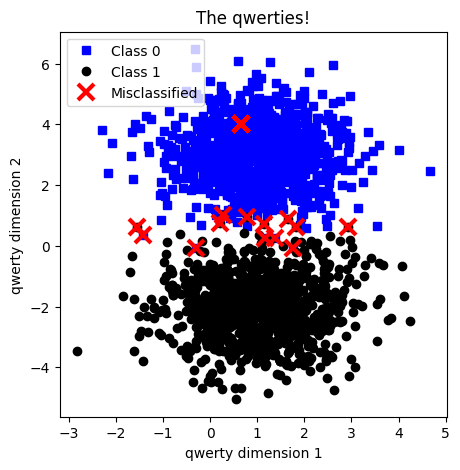

In [ ]:
# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.legend(['Class 0','Class 1','Misclassified'])
plt.show();